In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
os.listdir('../input/imet-2020-fgvc7')

['sample_submission.csv', 'train.csv', 'test', 'train', 'labels.csv']

In [35]:
train_data=pd.read_csv('../input/imet-2020-fgvc7/train.csv')
labels_data=pd.read_csv('../input/imet-2020-fgvc7/labels.csv')
sample_submission=pd.read_csv('../input/imet-2020-fgvc7/sample_submission.csv')

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142119 entries, 0 to 142118
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             142119 non-null  object
 1   attribute_ids  142119 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


In [37]:
train_data.head

<bound method NDFrame.head of                                       id                      attribute_ids
0       000040d66f14ced4cdd18cd95d91800f                       448 2429 782
1       0000ef13e37ef70412166725ec034a8a  2997 3231 2730 3294 3099 2017 784
2       0001eeb4a06e8daa7c6951bcd124c3c7                       2436 1715 23
3       000226398d224de78b191e6db45fd94e                  2997 3433 448 782
4       00029c3b0171158d63b1bbf803a7d750            3465 3322 3170 1553 781
...                                  ...                                ...
142114  fffd00c472c1856f5c8b7e41311e2344                      125 783 96 27
142115  fffdb3cde6cfd3b335fc56ecf2f1eae5             2732 3170 448 1559 785
142116  fffdde4325edb076dccea37978c1378a                  2813 233 1561 785
142117  fffe25dccc93a5e9e12f26d494dae26f       3095 408 1610 1470 1899 1449
142118  fffe66c4a175c96065551cebacb7636f          2788 3270 3170 946 783 29

[142119 rows x 2 columns]>

In [38]:
train_data.columns

Index(['id', 'attribute_ids'], dtype='object')

In [39]:
train_data.head(3)

,id,attribute_ids
0,000040d66f14ced4cdd18cd95d91800f,448 2429 782
1,0000ef13e37ef70412166725ec034a8a,2997 3231 2730 3294 3099 2017 784
2,0001eeb4a06e8daa7c6951bcd124c3c7,2436 1715 23


In [40]:
sample_submission.head

<bound method NDFrame.head of                                      id attribute_ids
0      00011f01965f141f5d1eea6592fa9862         0 1 2
1      00014abc91ed3e4bf1663fde8136fe80         0 1 2
2      0002e2054e303badc1a33463f6fb7973         0 1 2
3      0002e8f35f85f28bebfb28f2a627dc4d         0 1 2
4      00082dfc0de78506f96104bc05eb5a49         0 1 2
...                                 ...           ...
25953  fff1f6967735f801516a68d597b6e344         0 1 2
25954  fff3ab863ae35c23b13b3955a5aa2160         0 1 2
25955  fff67a7403a06b29c117dd4e9c905d43         0 1 2
25956  fff77d63bdafd26688b71eeada73b933         0 1 2
25957  fffc01eab9146491f58118a4be7acd3d         0 1 2

[25958 rows x 2 columns]>

In [41]:
sample_submission.info

<bound method DataFrame.info of                                      id attribute_ids
0      00011f01965f141f5d1eea6592fa9862         0 1 2
1      00014abc91ed3e4bf1663fde8136fe80         0 1 2
2      0002e2054e303badc1a33463f6fb7973         0 1 2
3      0002e8f35f85f28bebfb28f2a627dc4d         0 1 2
4      00082dfc0de78506f96104bc05eb5a49         0 1 2
...                                 ...           ...
25953  fff1f6967735f801516a68d597b6e344         0 1 2
25954  fff3ab863ae35c23b13b3955a5aa2160         0 1 2
25955  fff67a7403a06b29c117dd4e9c905d43         0 1 2
25956  fff77d63bdafd26688b71eeada73b933         0 1 2
25957  fffc01eab9146491f58118a4be7acd3d         0 1 2

[25958 rows x 2 columns]>

In [42]:
train_data['id'] += '.png'
sample_submission['id']+= '.png'

In [43]:
train_data['attribute_ids']=train_data['attribute_ids'].apply(lambda x: x.split())

In [44]:
train_data.head(5)

,id,attribute_ids
0,000040d66f14ced4cdd18cd95d91800f.png,"[448, 2429, 782]"
1,0000ef13e37ef70412166725ec034a8a.png,"[2997, 3231, 2730, 3294, 3099, 2017, 784]"
2,0001eeb4a06e8daa7c6951bcd124c3c7.png,"[2436, 1715, 23]"
3,000226398d224de78b191e6db45fd94e.png,"[2997, 3433, 448, 782]"
4,00029c3b0171158d63b1bbf803a7d750.png,"[3465, 3322, 3170, 1553, 781]"


**Image Preprocessing**
Image Data generator provides the easy way to augment your images

In [50]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 validation_split=0.2,                             
                                 fill_mode='nearest'                             
                                    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [51]:
batch_size=32


**Flow from dataframe is a method in ImageDataGenerator class that allows you to directly augment images by reading its name and target value from dataframe**

In [53]:
train_ds=train_datagen.flow_from_dataframe(dataframe=train_data,
                                          directory="/kaggle/input/imet-2020-fgvc7/train",
                                          x_col='id',
                                          y_col='attribute_ids',
                                          class_mode='categorical',
                                          subset='training',
                                          seed=123,
                                          shuffle=True,
                                          batch_size=batch_size,
                                          target_size=(128,128)
                                          )


Found 113696 validated image filenames belonging to 3471 classes.


In [54]:
valid_ds=train_datagen.flow_from_dataframe(dataframe=train_data,
                                          directory="/kaggle/input/imet-2020-fgvc7/train",
                                          x_col='id',
                                          y_col='attribute_ids',
                                          class_mode='categorical',
                                          subset='validation',
                                          seed=123,
                                          shuflle=True, 
                                          batch_size=batch_size,
                                          target_size=(128,128)
                                          )

Found 28423 validated image filenames belonging to 3471 classes.


In [49]:
test_ds=test_datagen.flow_from_dataframe(dataframe=sample_submission,
                                        directory="/kaggle/input/imet-2020-fgvc7/test",
                                        x_col='id',
                                        batch_size=batch_size,
                                        shuffle=False,
                                        class_mode=None,
                                        target_size=(128,128))

Found 25958 validated image filenames.


In [55]:
for image_batch,labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 128, 128, 3)
(32, 3471)


In [63]:
input_shape=(128,128,3)

model=Sequential()

model.add(Conv2D(16,3,padding='same',input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,3 ,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,3 ,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3471,activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)       

**Training the model**

In [65]:
type(train_ds)

tensorflow.python.keras.preprocessing.image.DataFrameIterator

In [66]:
epochs=10
history=model.fit(train_ds,epochs=epochs,steps_per_epoch=200,
                            validation_data=valid_ds,validation_steps=80,
                            verbose=1,callbacks=None,
                           use_multiprocessing=False)

Epoch 1/10
200/200 [==============================] - 233s 1s/step - loss: 29.2932 - accuracy: 0.0336 - val_loss: 26.3366 - val_accuracy: 0.0551
Epoch 2/10
200/200 [==============================] - 222s 1s/step - loss: 24.9019 - accuracy: 0.0327 - val_loss: 29.5375 - val_accuracy: 0.0047
Epoch 3/10
200/200 [==============================] - 219s 1s/step - loss: 23.8594 - accuracy: 0.0209 - val_loss: 25.3930 - val_accuracy: 0.0137
Epoch 4/10
200/200 [==============================] - 217s 1s/step - loss: 22.9292 - accuracy: 0.0341 - val_loss: 23.9089 - val_accuracy: 0.0215
Epoch 5/10
200/200 [==============================] - 212s 1s/step - loss: 22.9201 - accuracy: 0.0373 - val_loss: 34.6007 - val_accuracy: 0.0055
Epoch 6/10
200/200 [==============================] - 212s 1s/step - loss: 22.2469 - accuracy: 0.0558 - val_loss: 23.5180 - val_accuracy: 0.0559
Epoch 7/10
200/200 [==============================] - 206s 1s/step - loss: 22.3089 - accuracy: 0.0570 - val_loss: 23.3173 - val_ac

Text(0.5, 1.0, 'Training and validation loss')

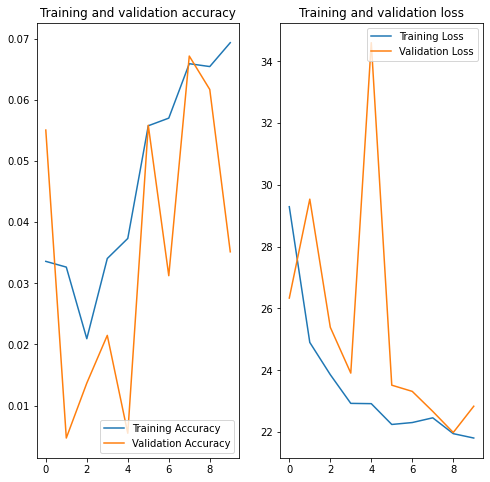

In [68]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']


loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)


plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,accuracy,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')



plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')






In [69]:
predictions=model.predict(test_ds,verbose=1)

812/812 [==============================] - 479s 590ms/step


In [76]:
pred_boolean=(predictions>0.2)

result=[]

labels=train_ds.class_indices

labels=dict((x,y) for y,x in labels.items())

for i in pred_boolean:
    list_labels=[]
    for j,k in enumerate(i):
        if k:
            list_labels.append(labels[j])
    result.append( " ".join(list_labels))

    
imagenames=test_ds.filenames

submission=pd.DataFrame({"id":imagenames,"attribute_ids":result})



In [80]:
submission.head(5)

,id,attribute_ids
0,00011f01965f141f5d1eea6592fa9862.png,149 2493 370
1,00014abc91ed3e4bf1663fde8136fe80.png,1071 233 2436 266 2804 2973 3052 45 782 783 784
2,0002e2054e303badc1a33463f6fb7973.png,124 149 2493 3263 370 784
3,0002e8f35f85f28bebfb28f2a627dc4d.png,1131 2714 3101 3170 3263 3465 784 800
4,00082dfc0de78506f96104bc05eb5a49.png,2103 233 2436 3170 511 781 782 783 784 946


In [81]:
submission['id']=submission['id'].apply( lambda x: x.split('.')[0])

In [ ]:
submission.head(5)

In [ ]:
submission.to_csv('submission_1.csv',index=False)